    A   B      C      D      E     F
0 NaN NaN    0.0    0.0    0.0   0.0
1 NaN NaN  111.0  111.0  102.0   3.0
2 NaN NaN  222.0  222.0  204.0   6.0
3 NaN NaN  333.0  333.0  306.0   9.0
4 NaN NaN  444.0  444.0  408.0  12.0


C:\Users\joshu\OneDrive\Desktop\ApplesML\source\utils.py:17: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df_tmp =  method(df_tmp.rolling(w, axis = ax ))
C:\Users\joshu\OneDrive\Desktop\ApplesML\source\utils.py:17: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df_tmp =  method(df_tmp.rolling(w, axis = ax ))
C:\Users\joshu\OneDrive\Desktop\ApplesML\source\utils.py:17: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df_tmp =  method(df_tmp.rolling(w, axis = ax ))
C:\Users\joshu\OneDrive\Desktop\ApplesML\source\utils.py:17: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df_tmp =  method(df_tmp.rolling(w, axis 

(562, 207)
(562, 69)
(562, 41)
(562, 20)


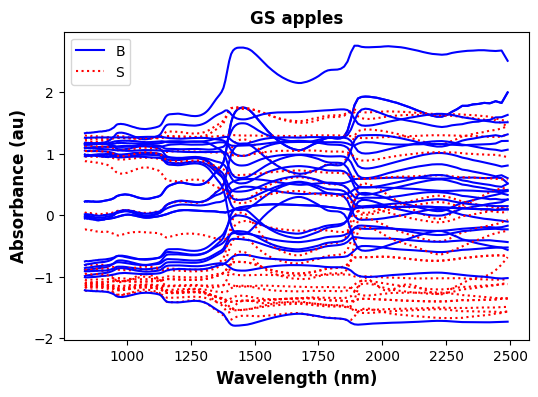

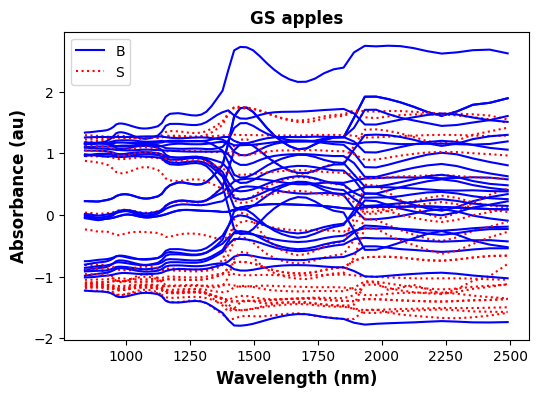

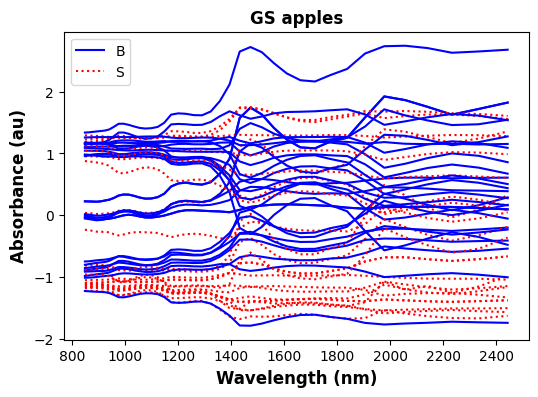

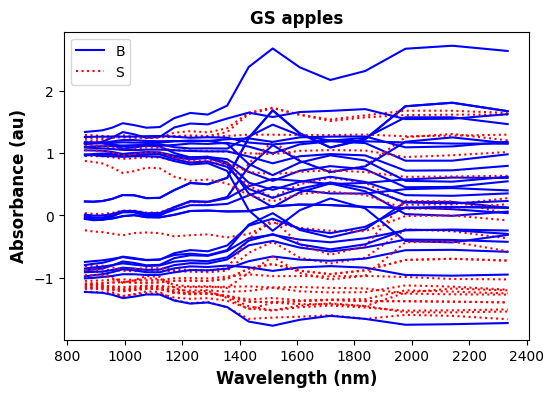


Rolling window set 1: (samples, features) = (393, 207)


C:\Users\joshu\OneDrive\Desktop\ApplesML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\joshu\OneDrive\Desktop\ApplesML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\joshu\OneDrive\Desktop\ApplesML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

✅ Precision on test set (rolled data 1): 0.7273

Rolling window set 2: (samples, features) = (393, 69)


C:\Users\joshu\OneDrive\Desktop\ApplesML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\joshu\OneDrive\Desktop\ApplesML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Precision on test set (rolled data 2): 0.7172

Rolling window set 3: (samples, features) = (393, 41)


C:\Users\joshu\OneDrive\Desktop\ApplesML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\joshu\OneDrive\Desktop\ApplesML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Precision on test set (rolled data 3): 0.7526

Rolling window set 4: (samples, features) = (393, 20)


C:\Users\joshu\OneDrive\Desktop\ApplesML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Precision on test set (rolled data 4): 0.7347


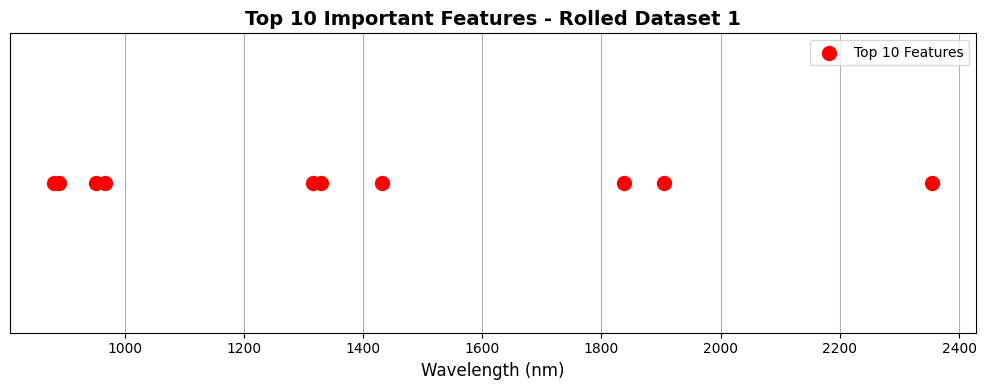

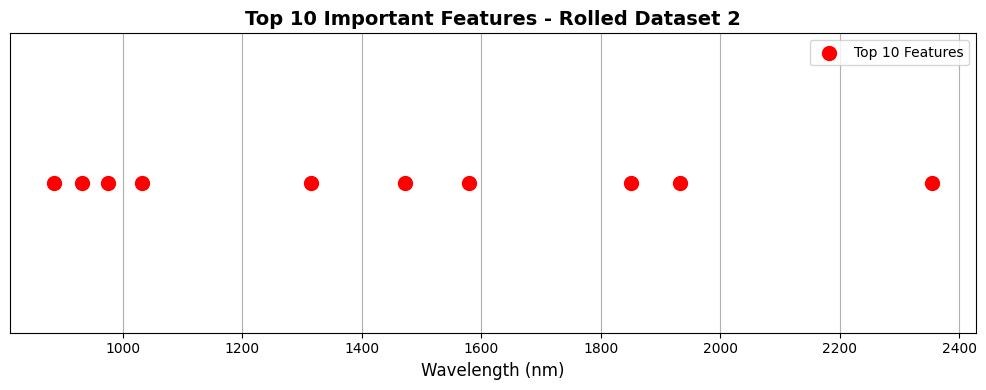

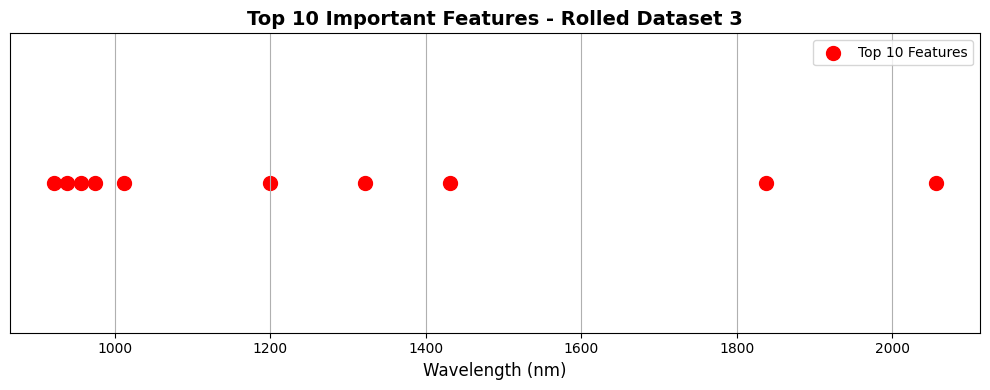

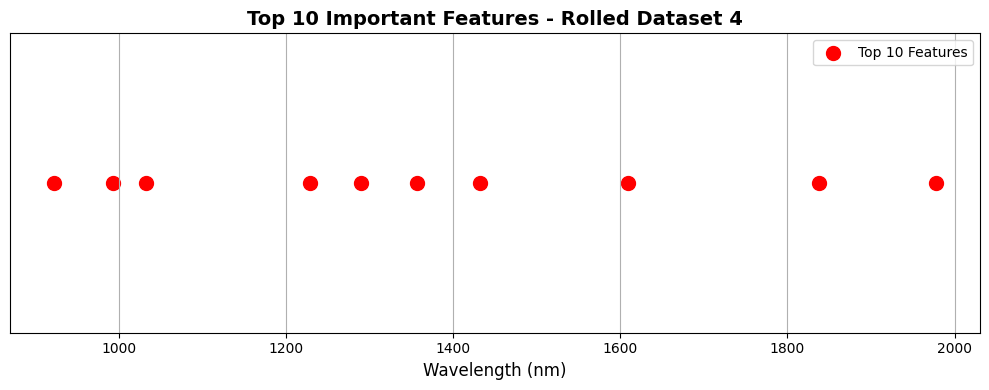

Stored 'X_arrayRol' (list)
Stored 'selected_indexes' (list)


In [10]:
# Granny Smith Apples 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%store -r X
%store -r Y
%store -r df

X.head(3)

# Dummy DataFrame to demonstrate rolling window
df_dummy = pd.DataFrame({
    'A': [0, 1, 2, 3, 4], 
    'B': [0, 10, 20, 30, 40], 
    'C': [0, 100, 200, 300, 400], 
    'D': [0, 1, 2, 3, 4],  
    'E': [0, 1, 2, 3, 4],  
    'F': [0, 1, 2, 3, 4]
})
df_dummy

# ✅ FIX: Replace deprecated rolling axis=1
df_dummyRoll = df_dummy.T.rolling(3).sum().T  # Removed axis parameter
print(df_dummyRoll)

df_dummyRoll = df_dummyRoll.iloc[:, 2::3]
df_dummyRoll

import sys
sys.path.append("..")
from source.utils import creat_rollingData, skew_df, mean_df, kurt_df
from source.graphs import graph_df
from source.utils import split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# Dummy rolling
df_arrayRol_dummy = creat_rollingData(df=df_dummy, window_arr=[2, 3], method=mean_df)
df_arrayRol_dummy

# Real data rolling
X_arrayRol = creat_rollingData(df=X, window_arr=[10, 30, 50, 100], method=mean_df)

# Show shapes
for x in X_arrayRol:
    print(x.shape)

# Graph
graph_df(X_arrayRol, Y, n=50)

# Map Y
Y = Y.map({'S': 1, 'B': 0})

selected_indexes = []

# Loop through each rolled dataset
for i, x_roll in enumerate(X_arrayRol):
    Xtrain, Xtest, Ytrain, Ytest = split(x_roll, Y)
    print(f"\nRolling window set {i+1}: (samples, features) = {Xtrain.shape}")

    model = LogisticRegression(solver='newton-cg', class_weight='balanced')
    sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=10, direction='forward', scoring='precision')
    sfs.fit(Xtrain.values, Ytrain)
    selected_indexes.append(sfs.support_)

    model.fit(Xtrain.values[:, sfs.get_support()], Ytrain)
    y_pred = model.predict(Xtest.values[:, sfs.get_support()])

    # Check for the number of predicted samples and handle precision calculation accordingly
    if len(np.unique(y_pred)) < 2:
        print(f"⚠️ Warning: Only one class predicted in rolled data {i+1}. Precision is not well-defined.")
        precision = 0.0  # Explicitly set precision to 0.0 for undefined cases
    else:
        precision = precision_score(Ytest, y_pred, zero_division=0)
        print(f"✅ Precision on test set (rolled data {i+1}): {precision:.4f}")


import matplotlib.pyplot as plt

# We'll use the original wavelengths from the first X (before rolling)
original_wavelengths = X.columns.astype(float)

# Loop through each rolled DataFrame and visualize selected features
for i, (rolled_df, support_mask) in enumerate(zip(X_arrayRol, selected_indexes)):
    selected_features = rolled_df.columns[support_mask].astype(float)

    plt.figure(figsize=(10, 4))
    plt.scatter(selected_features, np.ones_like(selected_features), color='red', label='Top 10 Features', s=100)
    plt.title(f"Top 10 Important Features - Rolled Dataset {i+1}", fontsize=14, fontweight='bold')
    plt.xlabel("Wavelength (nm)", fontsize=12)
    plt.yticks([])  # No y-axis needed
    plt.grid(True, axis='x')
    plt.legend()
    plt.tight_layout()
    plt.show()

%store X_arrayRol
%store selected_indexes
